In [2]:
%pip install seaborn
%pip install nltk

     -------------------------------------- 293.3/293.3 kB 2.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: C:\Users\heena\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 23.1
[notice] To update, run: C:\Users\heena\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



     ---------------------------------------- 1.5/1.5 MB 10.7 MB/s eta 0:00:00
     ------------------------------------- 267.9/267.9 kB 16.1 MB/s eta 0:00:00


In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer 

Matplotlib is building the font cache; this may take a moment.


In [114]:
import nltk 


In [4]:
# pip install nltk
import nltk 
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer # Word net is a corpus of root words in its simplest form 

nltk.download('stopwords') # Installs the Corpus (collection) of common words   
nltk.download('punkt') #tokenizer method which uses unsupervised algorithm to create word into tokens
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download(["names", "brown", "twitter_samples",
               "movie_reviews", "averaged_perceptron_tagger", "vader_lexicon",])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data] Downloading package names to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\names.zip.
[nltk_data] Downloading package state_union to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\state_union.zip.
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\heena\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\twitter_samples.zip.
[nltk_data] Downloading package

True

## Different Tokenizers

In [30]:
#Sentence Tokenizer
from nltk.tokenize import sent_tokenize
s = '''Good muffins cost $3.88\nin New York.  Please buy me \n two of them.\n\nThanks.'''
sent_tokenize(s) 

['Good muffins cost $3.88\nin New York.',
 'Please buy me \n two of them.',
 'Thanks.']

In [31]:
#word tokenizers
from nltk.tokenize import word_tokenize
s = '''Good muffins cost $3.88\nin New York.  Please buy me two of them.\n\nThanks.'''
print(word_tokenize(s)) 

from nltk.tokenize import TreebankWordTokenizer
treebankWordTokenizer = TreebankWordTokenizer()
print(treebankWordTokenizer.tokenize(s))

from nltk.tokenize import WhitespaceTokenizer
whitespaceTokenizer = WhitespaceTokenizer()
print(whitespaceTokenizer.tokenize(s))


s = '''https://t.co/9z2J3P33Uc FB needs to hurry up 
and add a laugh/cry button 😬😭😓🤢🙄😱
Since eating my feelings has not fixed the world's problems,
I guess I'll try to sleep...
HOLY CRAP: DeVos questionnaire appears to include passages
from uncited sources https://t.co/FNRoOlfw9s well played,
Senator Murray Keep the pressure on: https://t.co/4hfOsmdk0l 
@datageneral thx Mr Taussig 
It's interesting how many people contact me about applying for a PhD 
and don't spell my name right #facebook #crap #devops #SenatorMurray'''

print(word_tokenize(s)) 

from nltk.tokenize import TweetTokenizer
tweetTokenizer = TweetTokenizer()
print(tweetTokenizer.tokenize(s))

['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York', '.', 'Please', 'buy', 'me', 'two', 'of', 'them', '.', 'Thanks', '.']
['Good', 'muffins', 'cost', '$', '3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks', '.']
['Good', 'muffins', 'cost', '$3.88', 'in', 'New', 'York.', 'Please', 'buy', 'me', 'two', 'of', 'them.', 'Thanks.']
['https', ':', '//t.co/9z2J3P33Uc', 'FB', 'needs', 'to', 'hurry', 'up', 'and', 'add', 'a', 'laugh/cry', 'button', '😬😭😓🤢🙄😱', 'Since', 'eating', 'my', 'feelings', 'has', 'not', 'fixed', 'the', 'world', "'s", 'problems', ',', 'I', 'guess', 'I', "'ll", 'try', 'to', 'sleep', '...', 'HOLY', 'CRAP', ':', 'DeVos', 'questionnaire', 'appears', 'to', 'include', 'passages', 'from', 'uncited', 'sources', 'https', ':', '//t.co/FNRoOlfw9s', 'well', 'played', ',', 'Senator', 'Murray', 'Keep', 'the', 'pressure', 'on', ':', 'https', ':', '//t.co/4hfOsmdk0l', '@', 'datageneral', 'thx', 'Mr', 'Taussig', 'It', "'s", 'interesting', 'how', 'many'

## Stemming

#### Stemming helps us reduce words to their core or base form,
which can be useful in various applications such as information retrieval, 
text analysis, and language processing.
It's a handy tool for simplifying words and understanding their fundamental meaning.

words are modified to communicate many grammatical categories, including tense, case, voice, aspect, person, number, gender, and mood. Thus, although a word may exist in several forms, having multiple  forms inside the same text adds redundancy to the NLP process

In [39]:
from nltk.stem import *
from nltk.stem.porter import *
stemmer = PorterStemmer()
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
    'died', 'agreed', 'owned', 'humbled', 'sized',
    'meeting', 'stating', 'siezing', 'itemization',
    'sensational', 'traditional', 'reference', 'colonizer',
    'plotted']
singles = [stemmer.stem(plural) for plural in plurals]
print(' '.join(singles))

caress fli die mule deni die agre own humbl size meet state siez item sensat tradit refer colon plot


In [40]:
from nltk.stem.snowball import SnowballStemmer
print(" ".join(SnowballStemmer.languages))

arabic danish dutch english finnish french german hungarian italian norwegian porter portuguese romanian russian spanish swedish


In [41]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("running"))

run


In [42]:
stemmer2 = SnowballStemmer("french")
print(stemmer.stem("en voyageant"))

en voyag


In [44]:
stemmer3 = SnowballStemmer("german")
print(stemmer.stem("Ich reise"))

ich reis


In [45]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("better"))

better


In [48]:
stemmer = SnowballStemmer("english")
print(stemmer.stem("mice"))

mice


## Lemmatisation

#### Lemmatization is a bit like finding the "dictionary form" of a word.
It's like when you look up a word in a dictionary, 
and you see the word in its base or simplest form,
without any prefixes or suffixes. That's what lemmatization does for words!

In English, words can have different forms,
like "go", "going", and "went". But they all share a common base form,
which is "go". 
Lemmatization is the process of reducing words to their base or dictionary form, 
known as the "lemma", so that we can group similar words together 
and understand their core meaning.

For example, if we have the words "go", "going", and "went", 
after lemmatization, they would all become "go". 
It's like finding the main entry in a dictionary for a word, so we can understand its basic meaning without worrying about the extra details.

Lemmatization takes into account the grammatical rules of a language to ensure that the resulting lemma is a valid word. For instance, it would correctly identify that the lemma of "better" is "good", and the lemma of "mice" is "mouse". It's a powerful tool used in natural language processing to normalize words and reduce them to their base or canonical form for various language analysis tasks.

In [52]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("ran", pos="v"))

cat
cactus
goose
rock
python
good
best
run


## Lemmatisation vs Stemming

#### Lemmatization and stemming are both techniques used in natural language processing to reduce words to their base or canonical form, but they have some differences:

1. Word Accuracy: Lemmatization typically produces a more accurate base form or lemma compared to stemming. This is because lemmatization takes into account the grammatical rules of a language, whereas stemming simply removes prefixes or suffixes from words. As a result, lemmatization tends to produce valid words that can be found in a dictionary, while stemming may sometimes produce truncated or non-words.

2. Base Form: Lemmatization produces the actual base or dictionary form of a word, known as the lemma. For example, the lemma of "better" is "good", and the lemma of "mice" is "mouse". On the other hand, stemming produces a truncated version of a word by removing prefixes or suffixes, which may not always result in a valid word. For example, the stem of "running" is "run", but "run" is a valid word, whereas "runn" is not.

3. Language Rules: Lemmatization takes into account the specific grammatical rules of a language, such as verb conjugation and noun plurals, to produce the correct base form. Stemming, on the other hand, simply applies a set of predefined rules or patterns to strip off prefixes or suffixes, which may not always result in the correct base form.

4. Output: Lemmatization generally produces fewer word forms compared to stemming, as it aims to reduce words to their common base form. Stemming, on the other hand, may produce multiple word forms as it applies a set of rules to strip off prefixes or suffixes without considering the context or meaning of the word.

5. Application: Lemmatization is often preferred in applications where accurate base forms are required, such as information retrieval, machine translation, and sentiment analysis. Stemming, on the other hand, may be used in applications where word reduction is desired for tasks like text classification, information retrieval with fuzzy matching, or for building search engine indexes.

In summary, lemmatization and stemming are techniques used to reduce words to their base or canonical form, but lemmatization tends to produce more accurate base forms by considering the grammatical rules of a language, while stemming may produce truncated word forms without considering language rules. The choice between lemmatization and stemming depends on the specific requirements and context of the application being used.

## Part of Speech Tagging

In [69]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words("ca01")
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
tag_fd.most_common(10)

[('NN', 327),
 ('AT', 217),
 ('IN', 203),
 ('NNS', 119),
 ('NP', 105),
 ('.', 88),
 ('JJ', 87),
 (',', 87),
 ('NN-TL', 82),
 ('VBD', 75)]

In [66]:
text = word_tokenize("We are going together for a walk")
nltk.pos_tag(text)

[('We', 'PRP'),
 ('are', 'VBP'),
 ('going', 'VBG'),
 ('together', 'RB'),
 ('for', 'IN'),
 ('a', 'DT'),
 ('walk', 'NN')]

## Sentiment Analysis

In [91]:
sentences = ["Quality is nice.", "It is just too good", "Worth for the price",
         "Defective product", "Received wrong color", "Bad quality of the fabric"]

docs = [word_tokenize(sent) for sent in sentences]
print(docs)

[['Quality', 'is', 'nice', '.'], ['It', 'is', 'just', 'too', 'good'], ['Worth', 'for', 'the', 'price'], ['Defective', 'product'], ['Received', 'wrong', 'color'], ['Bad', 'quality', 'of', 'the', 'fabric']]


In [92]:
docs = [[word.lower() for word in doc] for doc in docs]
print(docs)

[['quality', 'is', 'nice', '.'], ['it', 'is', 'just', 'too', 'good'], ['worth', 'for', 'the', 'price'], ['defective', 'product'], ['received', 'wrong', 'color'], ['bad', 'quality', 'of', 'the', 'fabric']]


In [93]:
stemmer = PorterStemmer()
docs = [[stemmer.stem(word) for word in doc] for doc in docs]
print(docs)

[['qualiti', 'is', 'nice', '.'], ['it', 'is', 'just', 'too', 'good'], ['worth', 'for', 'the', 'price'], ['defect', 'product'], ['receiv', 'wrong', 'color'], ['bad', 'qualiti', 'of', 'the', 'fabric']]


In [94]:
stop_w = stopwords.words('english') # We will only consider english words
stop_w.append(".")
docs = [[stemmer.stem(word) for word in doc if word not in stop_w] for doc in docs]
print(docs)

[['qualiti', 'nice'], ['good'], ['worth', 'price'], ['defect', 'product'], ['receiv', 'wrong', 'color'], ['bad', 'qualiti', 'fabric']]


In [95]:
def compute_vocabulary(docs):
    vocabulary = set()
    for doc in docs:
        vocabulary.update(doc)
    return vocabulary
vocabulary = compute_vocabulary(docs)
print("Vocabulary:", vocabulary)

Vocabulary: {'product', 'bad', 'good', 'qualiti', 'defect', 'price', 'color', 'fabric', 'worth', 'wrong', 'receiv', 'nice'}


In [109]:
def find_inverse_vocab(vocabulary):
    inv_vocab = {}
    for item in vocabulary:
        inv_vocab[vocabulary[item]] = item
    return inv_vocab

In [ ]:
documents = [" ".join(doc) for doc in docs]
vectorizer = CountVectorizer()
vectorizer.fit(documents)
print(vectorizer.vocabulary_)

In [ ]:
inv_vocab = find_inverse_vocab(vectorizer.vocabulary_)
print(inv_vocab)

In [ ]:
features = vectorizer.transform(documents)
print(features.toarray())

In [113]:
featuresDf = pd.DataFrame(features.toarray())
featuresDf.columns = [inv_vocab[index] for index in range(len(inv_vocab))]
featuresDf.head(10)

{'qualiti': 8, 'nice': 5, 'good': 4, 'worth': 10, 'price': 6, 'defect': 2, 'product': 7, 'receiv': 9, 'wrong': 11, 'color': 1, 'bad': 0, 'fabric': 3}
{8: 'qualiti', 5: 'nice', 4: 'good', 10: 'worth', 6: 'price', 2: 'defect', 7: 'product', 9: 'receiv', 11: 'wrong', 1: 'color', 0: 'bad', 3: 'fabric'}
[[0 0 0 0 0 1 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 1 0 1]
 [1 0 0 1 0 0 0 0 1 0 0 0]]


,bad,color,defect,fabric,good,nice,price,product,qualiti,receiv,worth,wrong
0,0,0,0,0,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0,0,0,1,0,1
5,1,0,0,1,0,0,0,0,1,0,0,0


## Movie Reviews Dataset

In [67]:
from nltk.corpus import movie_reviews
document = [(movie_reviews.words(file_id),category) 
            for file_id in movie_reviews.fileids()
            for category in movie_reviews.categories(file_id)]
df = pd.DataFrame(document)
df.columns = ["Review", "Sentiment"]
df

,Review,Sentiment
0,"(plot, :, two, teen, couples, go, to, a, churc...",neg
1,"(the, happy, bastard, ', s, quick, movie, revi...",neg
2,"(it, is, movies, like, these, that, make, a, j...",neg
3,"("", quest, for, camelot, "", is, warner, bros, ...",neg
4,"(synopsis, :, a, mentally, unstable, man, unde...",neg
...,...,...
1995,"(wow, !, what, a, movie, ., it, ', s, everythi...",pos
1996,"(richard, gere, can, be, a, commanding, actor,...",pos
1997,"(glory, --, starring, matthew, broderick, ,, d...",pos
1998,"(steven, spielberg, ', s, second, epic, film, ...",pos


## Exercise

In [33]:
data = pd.read_csv('textData.csv')
data.sample(20)

,Question Number,Answer,Marks,Correct Answer
8,1.1,Simulating the behavior of only a portion of t...,5.0,To simulate the behaviour of portions of the d...
99,1.5,An identifier that holds a location in memory.,4.0,A location in memory that can store a value.
53,1.3,Easier to debugg Reusability,3.0,Abstraction and reusability.
64,1.3,They make it easier to reuse and adapt previou...,4.5,Abstraction and reusability.
115,1.6,In the Function main() before using the variable.,3.0,Variables can be declared anywhere in a progra...
120,1.6,They can be declared globally just before the ...,5.0,Variables can be declared anywhere in a progra...
66,1.3,"Existing classes can be feused, Program mainte...",3.5,Abstraction and reusability.
104,1.5,A pointer to a location in memory.,4.0,A location in memory that can store a value.
24,1.2,"Verification, coding, refining the solution an...",4.5,The testing stage can influence both the codin...
5,1.1,To address major issues in the creation of the...,2.5,To simulate the behaviour of portions of the d...


In [38]:
data['Answer'][136], data['Correct Answer'][136]

('variables can be declared in classes and methods.',
 'Variables can be declared anywhere in a program. They can be declared inside a function (local variables) or outside the functions (global variables)')

In [4]:
correc_answer = data['Correct Answer'][0]
correc_answer

'To simulate the behaviour of portions of the desired software product.'

In [5]:
data['Answer'][2]

'Defined in the Specification phase a prototype stimulates the behavior of portions of the desired software product.  Meaning, the role of a prototype is a temporary solution until the program itself is refined to be used extensively in problem solving.'

In [6]:
correc_answer = correc_answer.lower()
correc_answer

'to simulate the behaviour of portions of the desired software product.'

In [7]:
type(correc_answer)

str

In [8]:
correc_answer = word_tokenize(correc_answer)
correc_answer

['to',
 'simulate',
 'the',
 'behaviour',
 'of',
 'portions',
 'of',
 'the',
 'desired',
 'software',
 'product',
 '.']

In [9]:
stop_w = stopwords.words('english') # We will only consider english words

In [10]:
stop_w

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [11]:
stop_w.extend('.')

In [12]:
correc_answer = [word for word in correc_answer if word not in stop_w]
correc_answer

['simulate', 'behaviour', 'portions', 'desired', 'software', 'product']

In [13]:
ps = PorterStemmer() 

In [14]:
test_words = ["desire", "desires","desirable", "desiring", "desiri", "eat", "eating", "ate", "feet"]
for w in test_words:
    print(w, "|", ps.stem(w))

desire | desir
desires | desir
desirable | desir
desiring | desir
desiri | desiri
eat | eat
eating | eat
ate | ate
feet | feet


In [15]:
stem_words = [ps.stem(w) for w in correc_answer]
stem_words

['simul', 'behaviour', 'portion', 'desir', 'softwar', 'product']

In [16]:
correc_answer

['simulate', 'behaviour', 'portions', 'desired', 'software', 'product']

In [17]:
lemmatizer = WordNetLemmatizer()
for w in test_words:
    print(w, "|", lemmatizer.lemmatize(w))

desire | desire
desires | desire
desirable | desirable
desiring | desiring
desiri | desiri
eat | eat
eating | eating
ate | ate
feet | foot


In [18]:
lem_words = [ lemmatizer.lemmatize(word) for word in correc_answer] 
lem_words

['simulate', 'behaviour', 'portion', 'desired', 'software', 'product']

In [19]:
answers = [data['Answer'][0]]
answers.append(data['Answer'][3])
answers 

['To simulate portions of the desired final product with a quick and easy program that does a small specific job. It is a way to help see what the problem is and how you may solve it in the final project.',
 'It is used to let the users have a first idea of the completed program and allow the clients to evaluate the program. This can generate much feedback including software specifications and project estimations of the total project.']

In [20]:
len(answers[1])

229

Text(0, 0.5, 'Number of words')

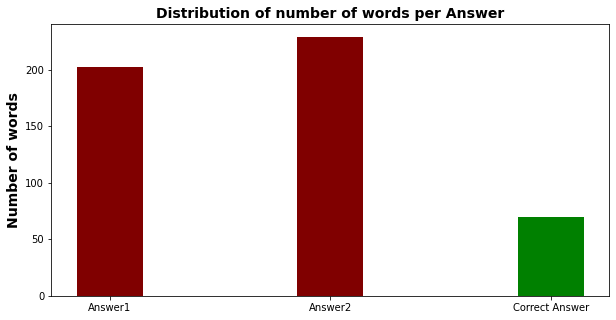

In [21]:
plt.figure(figsize=(10,5))
# plt.rcParams.update({'font.size': 14})
values = [len(answer) for answer in answers]
plt.bar(['Answer1','Answer2'], values, color ='maroon',width = 0.3)
plt.bar(['Correct Answer'], [len(data['Correct Answer'][0])], color ='green',width = 0.3)
plt.title('Distribution of number of words per Answer',weight='bold',fontsize=14)
plt.ylabel("Number of words",weight='bold',fontsize=14)


In [22]:
student1 = answers[0]
student1

'To simulate portions of the desired final product with a quick and easy program that does a small specific job. It is a way to help see what the problem is and how you may solve it in the final project.'

In [23]:
student1 = student1.lower() # str
student1 = word_tokenize(student1) # list
student1 = [word for word in student1 if word not in stop_w] # list
student1 = [ps.stem(w) for w in student1] # list

In [24]:
student1

['simul',
 'portion',
 'desir',
 'final',
 'product',
 'quick',
 'easi',
 'program',
 'small',
 'specif',
 'job',
 'way',
 'help',
 'see',
 'problem',
 'may',
 'solv',
 'final',
 'project']

In [25]:
answers[1]

'It is used to let the users have a first idea of the completed program and allow the clients to evaluate the program. This can generate much feedback including software specifications and project estimations of the total project.'

In [26]:
student4 = answers[1]
student4 = student4.lower()
student4 = word_tokenize(student4)
student4 = [word for word in student4 if word not in stop_w]
student4 = [ps.stem(w) for w in student4]

In [27]:
student4

['use',
 'let',
 'user',
 'first',
 'idea',
 'complet',
 'program',
 'allow',
 'client',
 'evalu',
 'program',
 'gener',
 'much',
 'feedback',
 'includ',
 'softwar',
 'specif',
 'project',
 'estim',
 'total',
 'project']

Text(0, 0.5, 'Number of words')

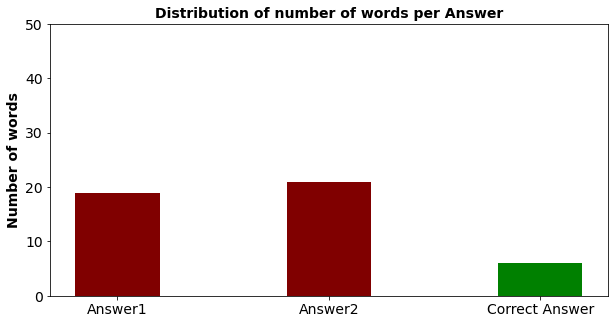

In [28]:
plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 14})
values = [len(answer) for answer in answers]
plt.bar(['Answer1','Answer2'], [len(student1),len(student4)] , color ='maroon',width = 0.4)
plt.bar(['Correct Answer'], [len(correc_answer)], color ='green',width = 0.4)

plt.title('Distribution of number of words per Answer',weight='bold',fontsize=14)
plt.ylim(0,50)
plt.ylabel("Number of words",weight='bold',fontsize=14)


In [29]:
vectorizer = CountVectorizer()

In [30]:
correc_answer

['simulate', 'behaviour', 'portions', 'desired', 'software', 'product']

In [31]:
student1

['simul',
 'portion',
 'desir',
 'final',
 'product',
 'quick',
 'easi',
 'program',
 'small',
 'specif',
 'job',
 'way',
 'help',
 'see',
 'problem',
 'may',
 'solv',
 'final',
 'project']

In [32]:
docs = [
        ' '.join(correc_answer),
        ' '.join(student1),
        ' '.join(student4)
]

In [33]:
docs[0]

'simulate behaviour portions desired software product'

In [34]:
docs[1]

'simul portion desir final product quick easi program small specif job way help see problem may solv final project'

In [35]:
docs[2]

'use let user first idea complet program allow client evalu program gener much feedback includ softwar specif project estim total project'

In [36]:
x1 = vectorizer.fit_transform(docs)

In [37]:
x1.toarray()

array([[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
        0, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0]])

In [38]:
df = pd.DataFrame(x1.toarray(), index = ['Correct Answer','Answer1','Answer2'], 
                  columns = vectorizer.get_feature_names_out())
df

,allow,behaviour,client,complet,desir,desired,easi,estim,evalu,feedback,...,simulate,small,softwar,software,solv,specif,total,use,user,way
Correct Answer,0,1,0,0,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
Answer1,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,1,1,0,0,0,1
Answer2,1,0,1,1,0,0,0,1,1,1,...,0,0,1,0,0,1,1,1,1,0


In [39]:
def cosine_similarity(A,B):
  return np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))

In [41]:
array = df.values
correct_answer = array[0]
answer1 = array[1]
answer2 = array[2]


q1 = cosine_similarity(answer1,answer1)
q2 = cosine_similarity(correct_answer,answer1)
q3 = cosine_similarity(answer1,answer2)

q4 = cosine_similarity(correct_answer,answer2)
q5 = cosine_similarity(answer2,answer2)

q6 = cosine_similarity(correct_answer,correct_answer)



output = [  [q1,q2,q3],[q2,q6,q4],[q3,q4,q5] ]
output

[[1.0, 0.08908708063747481, 0.2182178902359924],
 [0.08908708063747481, 1.0000000000000002, 0.0],
 [0.2182178902359924, 0.0, 1.0]]

In [42]:
output = pd.DataFrame(output,index=['Answer1','Correct Answer','Answer2'], columns=['Answer1','Correct Answer','Answer2'])
output

,Answer1,Correct Answer,Answer2
Answer1,1.000000,0.089087,0.218218
Correct Answer,0.089087,1.000000,0.000000
Answer2,0.218218,0.000000,1.000000


Text(65.0, 0.5, ' ')

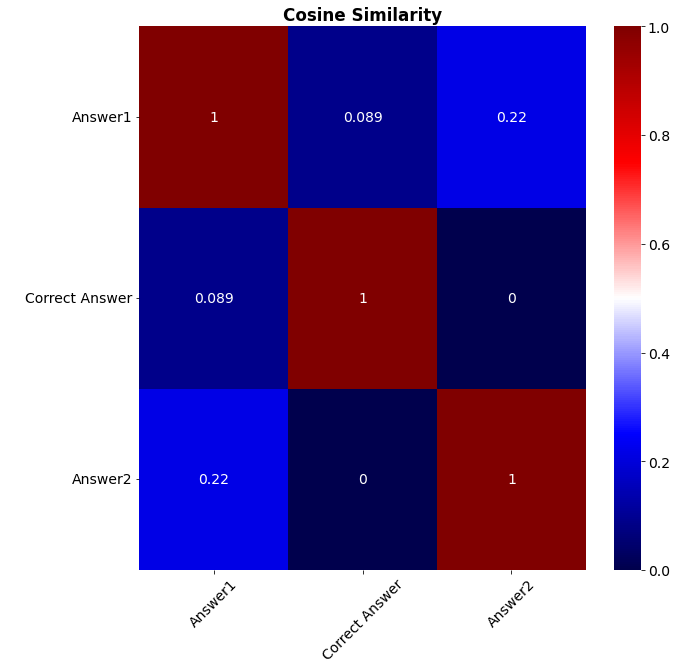

In [43]:
plt.figure(figsize=(10,10))
plt.title('Cosine Similarity',weight='bold')

sns.heatmap(output,vmin=0.0,vmax=1.0,cmap='seismic',annot=True)
plt.tick_params(labelbottom=True)
plt.yticks(rotation=0)
plt.xticks(rotation=45)

plt.ylabel(' ')